# HRV Parameter Visualization

This notebook visualizes the HRV parameters from the cleaned output data.

In [8]:

def clean_csv(input_file, output_file):
    with open(input_file, 'r') as f:
        lines = f.readlines()
    
    cleaned_lines = []
    header = "Timestamp,PPI_Count,Current_PPI,Mean_PPI,Median_PPI,Min_PPI,Max_PPI,SD_PPI,Prc20_PPI,Prc80_PPI,RMSSD,pPPI50,HTI,TIPPI,Total_Power,LF,HF,LF_HF_Ratio"
    last_timestamp = None
    
    cleaned_lines.append(header)
    
    for line in lines:
        line = line.strip()
        
        # Skip empty lines
        if not line:
            continue
            
        # Check if line has both START and END markers
        if not (line.startswith('START,') and line.endswith(',END')):
            continue
            
        # Remove START and END markers
        line = line[6:-4]  # Remove 'START,' and ',END'
        
        # Count commas to ensure we have all data points
        if line.count(',') != header.count(','):
            continue
        
        # Extract timestamp (first column) and convert to float
        try:
            current_timestamp = float(line.split(',')[0])
            ppi_count = int(line.split(',')[1])
            
            if ppi_count < 30:
                continue
            
            # Skip if timestamp is not greater than the previous one
            if last_timestamp is not None and current_timestamp <= last_timestamp:
                continue
                
            last_timestamp = current_timestamp
            
            # append the line to the cleaned lines
            cleaned_lines.append(line)
        except ValueError:
            # Skip lines where timestamp can't be converted to float
            continue
    
    # Write the cleaned data to the output file
    with open(output_file, 'w') as f:
        f.write('\n'.join(cleaned_lines))

# Usage
clean_csv('../out/csv/output.csv', '../out/csv/cleaned_output.csv')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Set style for better visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['axes.grid'] = True

In [18]:
# Read the CSV file
df = pd.read_csv('../out/csv/cleaned_output.csv')
df.head()

,Timestamp,PPI_Count,Current_PPI,Mean_PPI,Median_PPI,Min_PPI,Max_PPI,SD_PPI,Prc20_PPI,Prc80_PPI,RMSSD,pPPI50,HTI,TIPPI,Total_Power,LF,HF,LF_HF_Ratio
0,85.60,30,837,869.93,858.77,799,941,38.62,843,921,175,17.24,15.00,58,3309.0,1100.57,2184.81,0.50
1,86.41,30,842,867.07,858.77,799,941,37.38,843,905,175,17.24,7.50,58,3789.0,1109.58,2654.92,0.42
2,87.25,30,855,864.37,858.77,799,944,35.16,843,905,175,17.24,3.33,58,3405.0,1107.38,2276.65,0.49
3,88.11,30,818,861.83,858.77,799,944,35.67,835,905,175,17.24,15.00,58,3352.0,1081.43,2249.53,0.48
4,88.92,30,805,860.07,850.96,799,944,37.10,835,905,175,17.24,30.00,58,3440.0,1108.80,2308.54,0.48


## Plot Individual Parameters vs Time

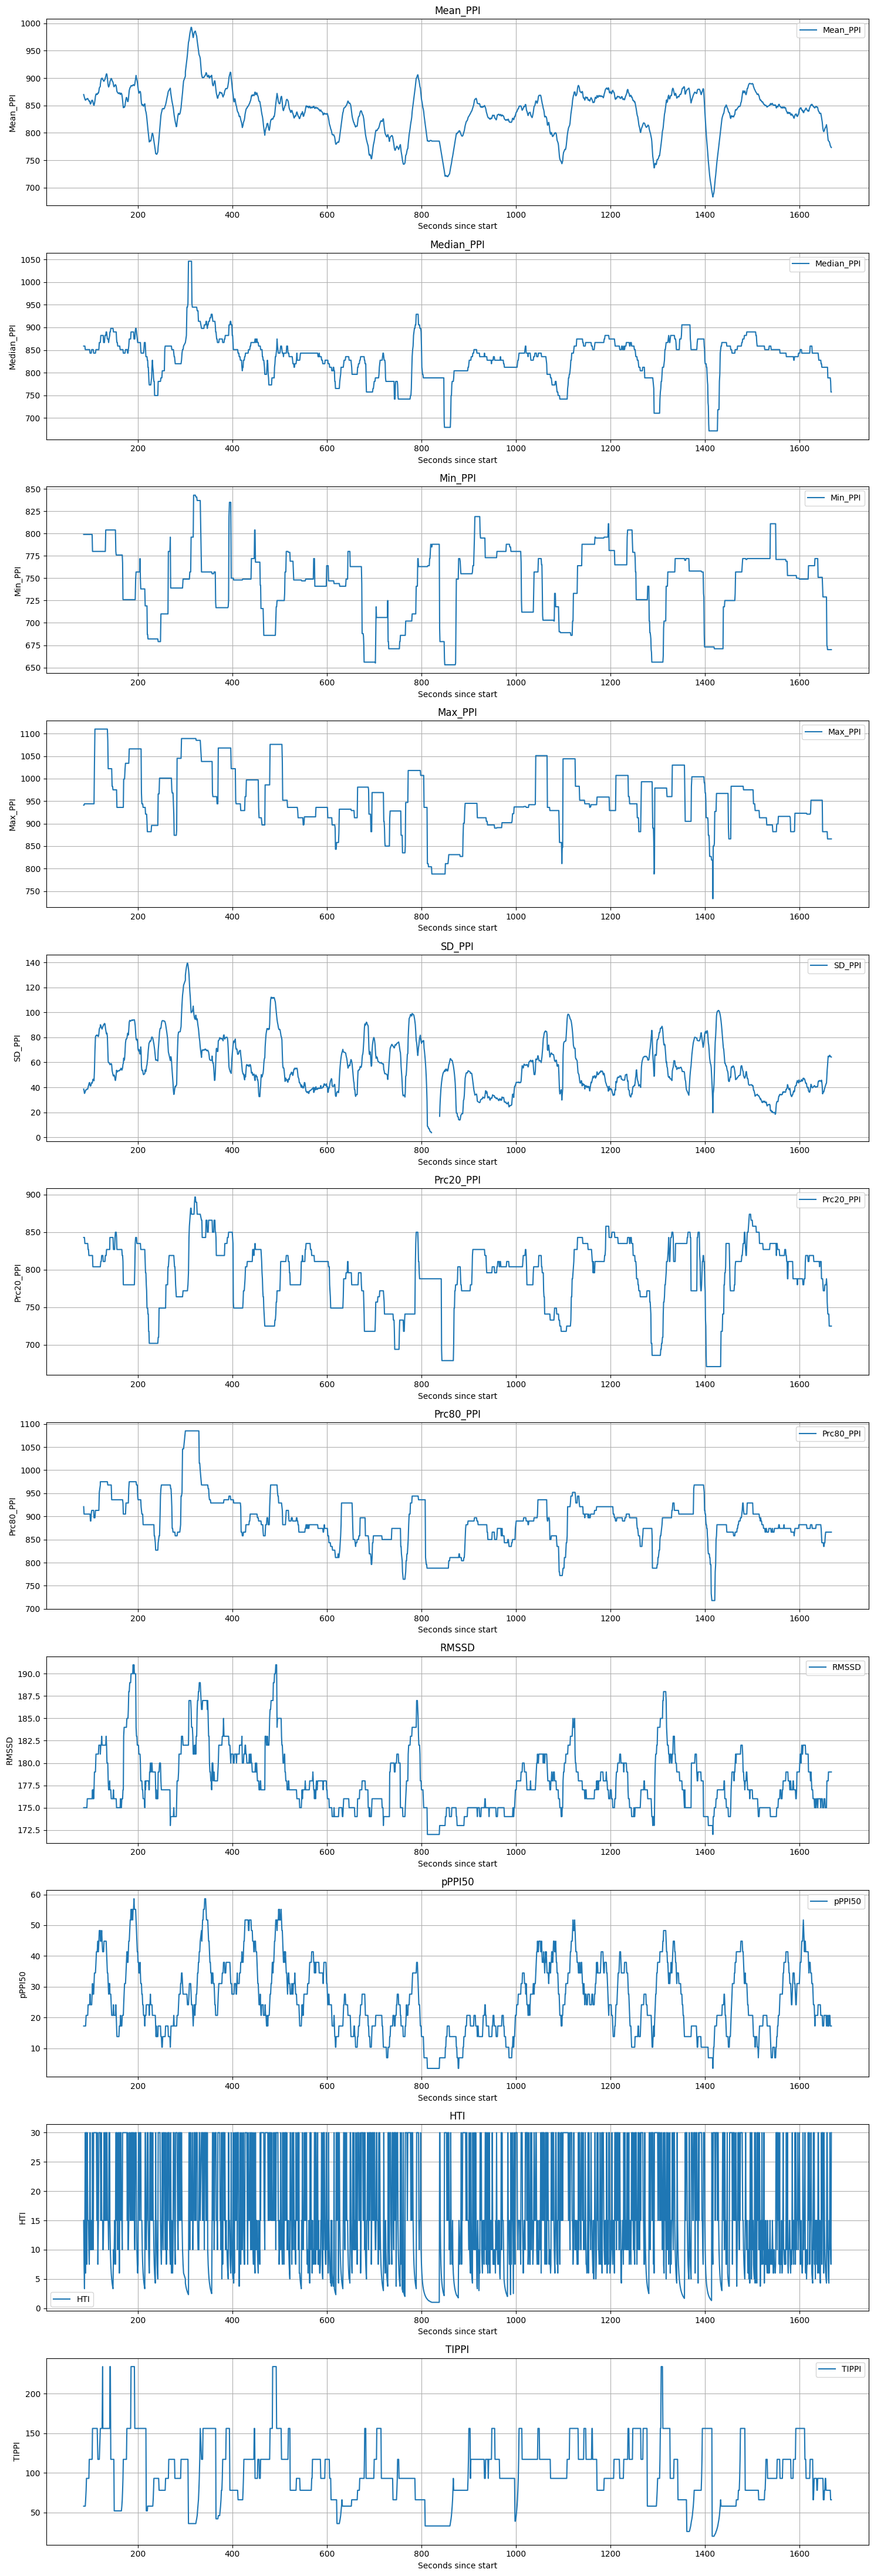

In [19]:
# Create a figure with subplots for each parameter
parameters = ['Mean_PPI', 'Median_PPI', 'Min_PPI', 'Max_PPI', 'SD_PPI', 
             'Prc20_PPI', 'Prc80_PPI', 'RMSSD', 'pPPI50', 'HTI', 'TIPPI']

fig, axes = plt.subplots(len(parameters), 1, figsize=(15, 4*len(parameters)))

for idx, param in enumerate(parameters):
    ax = axes[idx]
    ax.plot(df['Timestamp'], df[param], label=param)
    ax.set_title(param)
    ax.set_xlabel('Seconds since start')
    ax.set_ylabel(param)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Plot PPI-related Parameters Together

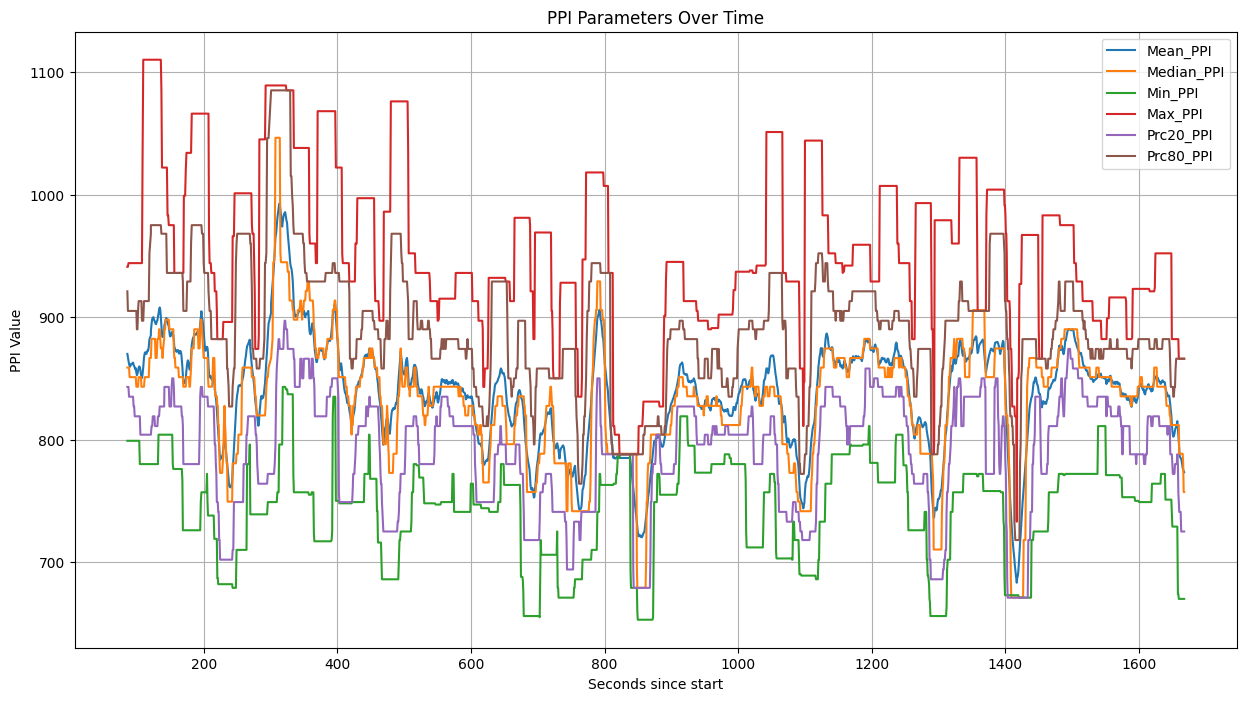

In [12]:
# Plot PPI-related Parameters Together
ppi_params = ['Mean_PPI', 'Median_PPI', 'Min_PPI', 'Max_PPI', 'Prc20_PPI', 'Prc80_PPI']

plt.figure(figsize=(15, 8))
for param in ppi_params:
    plt.plot(df['Timestamp'], df[param], label=param)

plt.title('PPI Parameters Over Time')
plt.xlabel('Seconds since start')
plt.ylabel('PPI Value')
plt.grid(True)
plt.legend()
plt.show()

## Plot MEM Related VO2 Parameters Individually

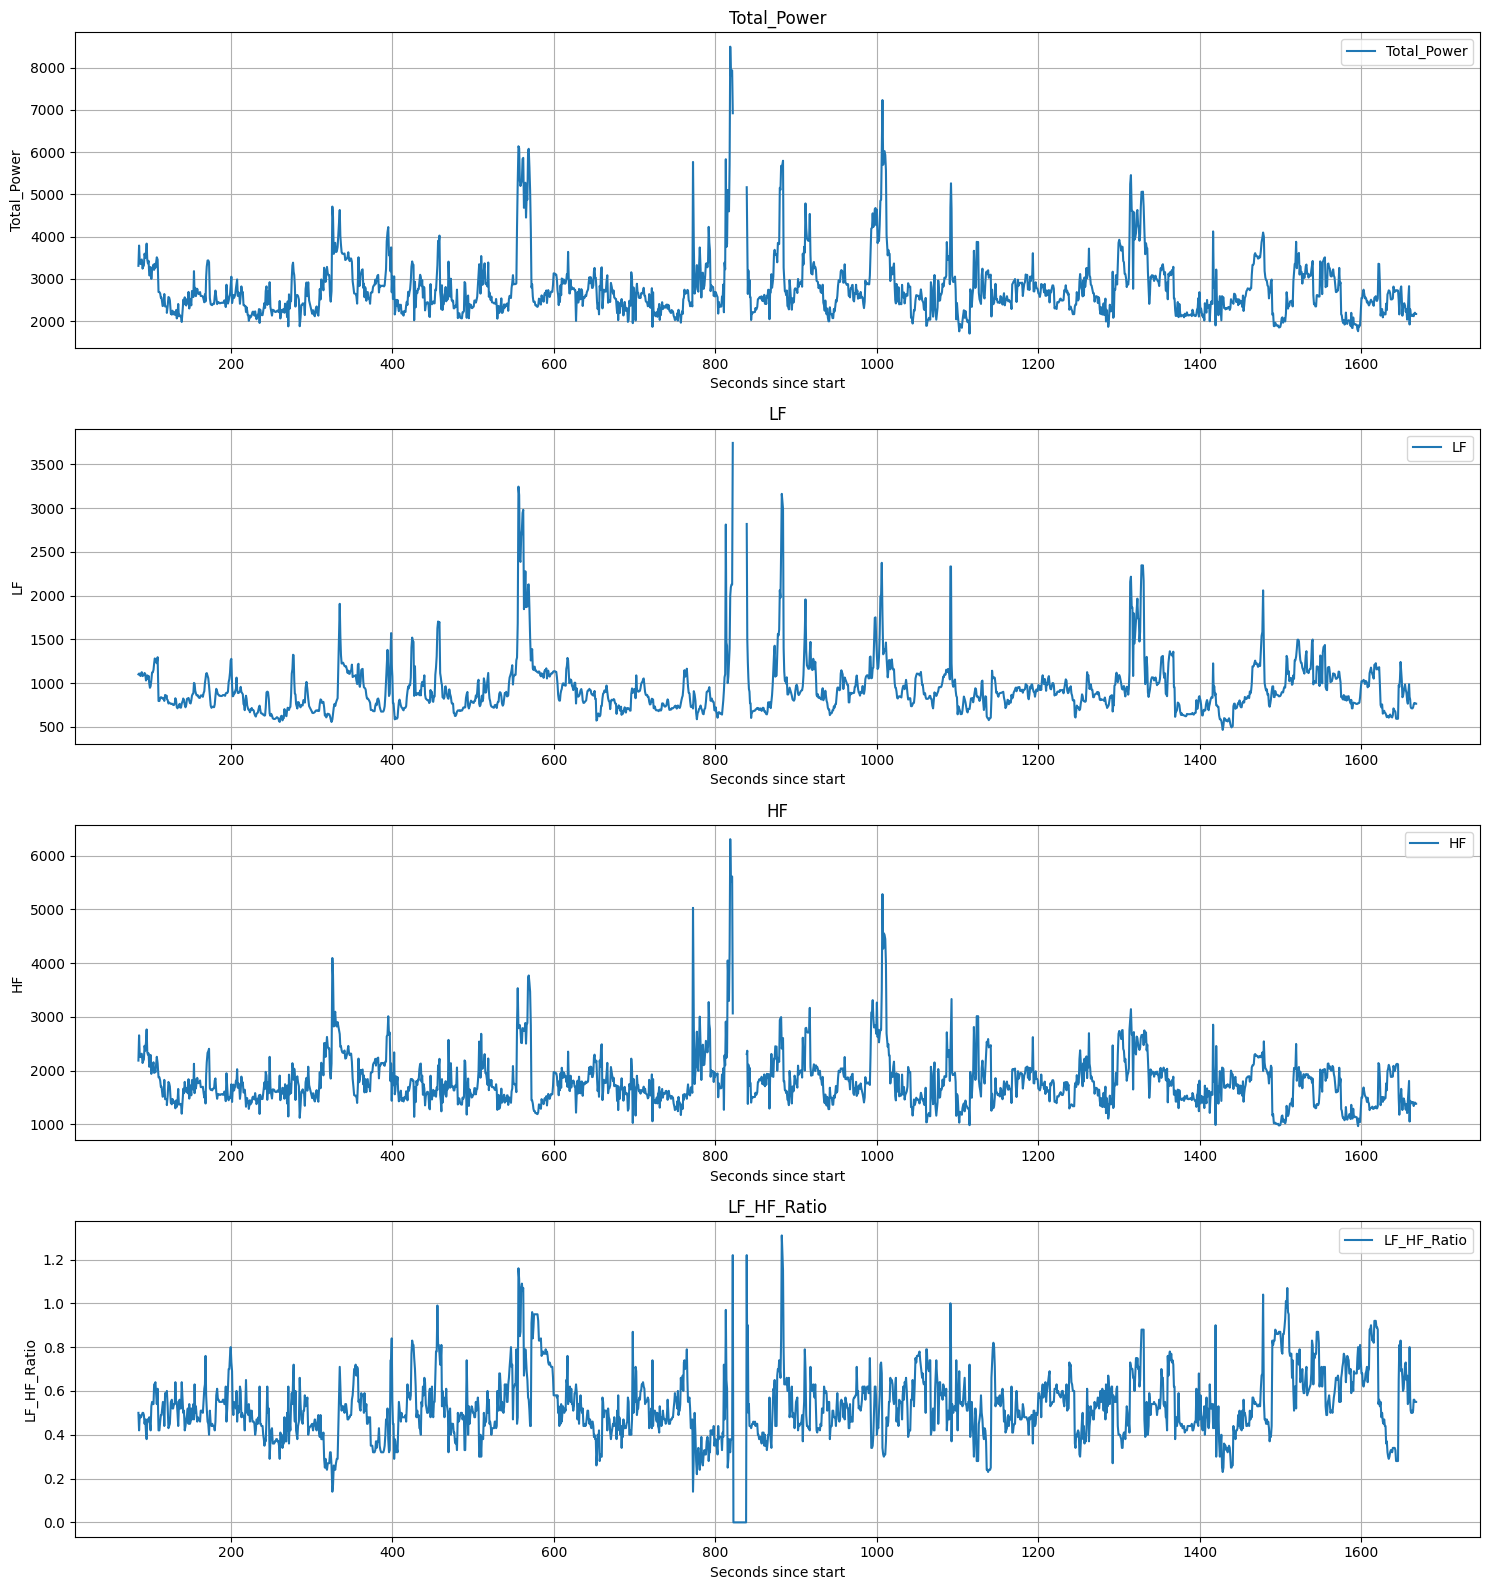

In [20]:
## Plot MEM Related VO2 Parameters Individually
parameters = ['Total_Power', 'LF', 'HF', 'LF_HF_Ratio']

fig, axes = plt.subplots(len(parameters), 1, figsize=(15, 4*len(parameters)))

for idx, param in enumerate(parameters):
    ax = axes[idx]
    ax.plot(df['Timestamp'], df[param], label=param)
    ax.set_title(param)
    ax.set_xlabel('Seconds since start')
    ax.set_ylabel(param)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Plot MEM Parameters Together

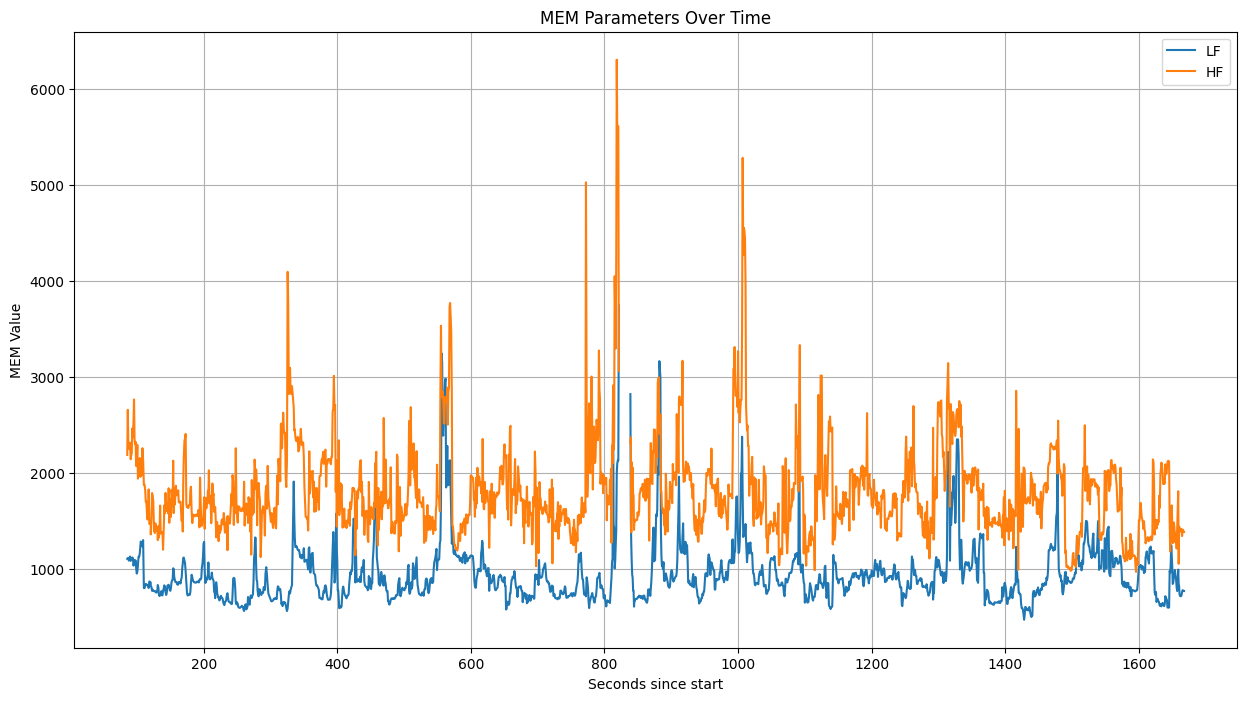

In [21]:
# Plot MEM Parameters Together
ppi_params = ['LF', 'HF']

plt.figure(figsize=(15, 8))
for param in ppi_params:
    plt.plot(df['Timestamp'], df[param], label=param)

plt.title('MEM Parameters Over Time')
plt.xlabel('Seconds since start')
plt.ylabel('MEM Value')
plt.grid(True)
plt.legend()
plt.show()